In [2]:
#https://github.com/krishnaik06/mlproject/blob/main/notebook/1%20.%20EDA%20STUDENT%20PERFORMANCE%20.ipynb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv("data/stud.csv")

In [42]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data Checks to perform

In [7]:
#check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.shape

(1000, 8)

In [43]:
#Check duplicated
duplicate=df[df.duplicated]
print(duplicate)
# So there are no duplicate rows in the dataframe

Empty DataFrame
Columns: [gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course, math_score, reading_score, writing_score]
Index: []


In [60]:
#check data types
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [66]:
#check unique values in each column
df.nunique()
for row in df:
    print(f'In {row} unique values are  {df[row].unique()}')

In gender unique values are  ['female' 'male']
In race_ethnicity unique values are  ['group B' 'group C' 'group A' 'group D' 'group E']
In parental_level_of_education unique values are  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
In lunch unique values are  ['standard' 'free/reduced']
In test_preparation_course unique values are  ['none' 'completed']
In math_score unique values are  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
In reading_score unique values are  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86

In [67]:
#check stats of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [69]:
#Check various categories present in the different categorical column
for row in df.columns:
    if df[row].dtype =='O':
        print(f'categorical features are {row}')
    if df[row].dtype!='O':
        print(f'numerical features are {row}')
   

categorical features are gender
categorical features are race_ethnicity
categorical features are parental_level_of_education
categorical features are lunch
categorical features are test_preparation_course
numerical features are math_score
numerical features are reading_score
numerical features are writing_score


In [4]:
# feature engineering (create columns for total score, avg score)
df['Total Score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average Score']=df['Total Score']/3

In [71]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [5]:
math_full= df[df['math_score'] ==100]['Average Score'].count()
writing_full=df[df['writing_score']==100]['Average Score'].count()
reading_full=df[df['reading_score']==100]['Average Score'].count()

In [131]:
math_full,writing_full,reading_full

(7, 14, 17)

In [6]:
reading_less_20 = df[df['reading_score']<=20]['Average Score'].count()
writing_less_20 = df[df['writing_score']<=20]['Average Score'].count()
math_less_20 = df[df['math_score']<=20]['Average Score'].count()


In [140]:
reading_less_20,writing_less_20,math_less_20

(1, 3, 4)

1. from above values we get studemts haveperformed the worst in Maths
2. Best performance is in reading section

<Axes: xlabel='Average Score', ylabel='Count'>

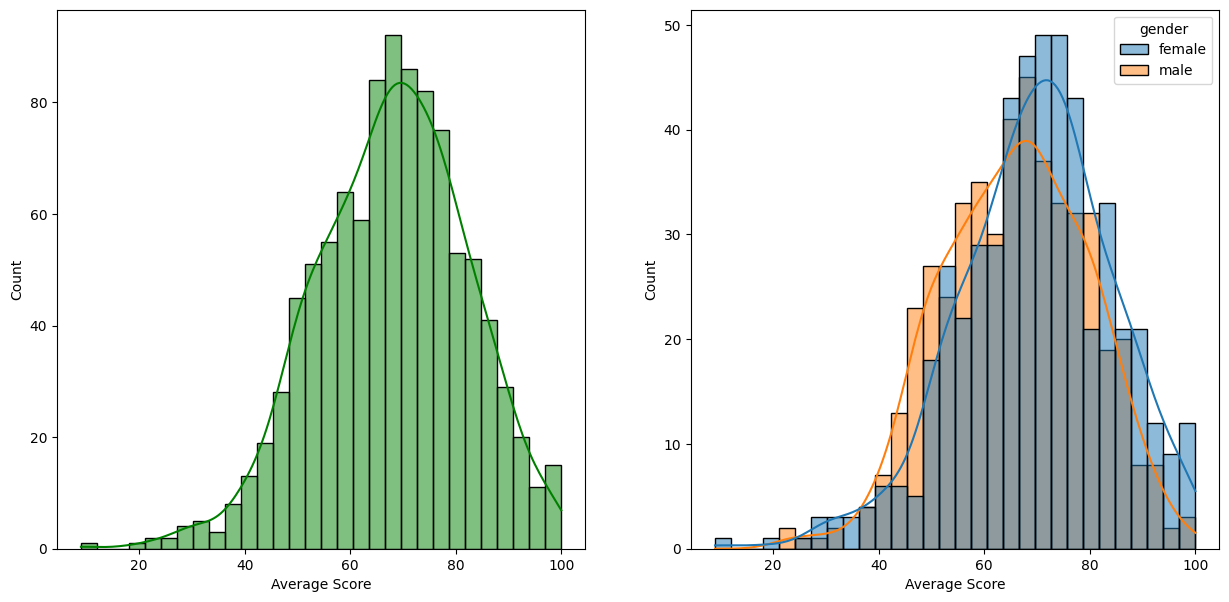

In [15]:
#Exploring data (Visualization)
#visualize average score distribution to make some conclusion.
#Histogram
#Kernel Distribution Function (KDE)
fig, axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average Score',bins=30,kde=True,hue='gender')


<Axes: xlabel='Total Score', ylabel='Count'>

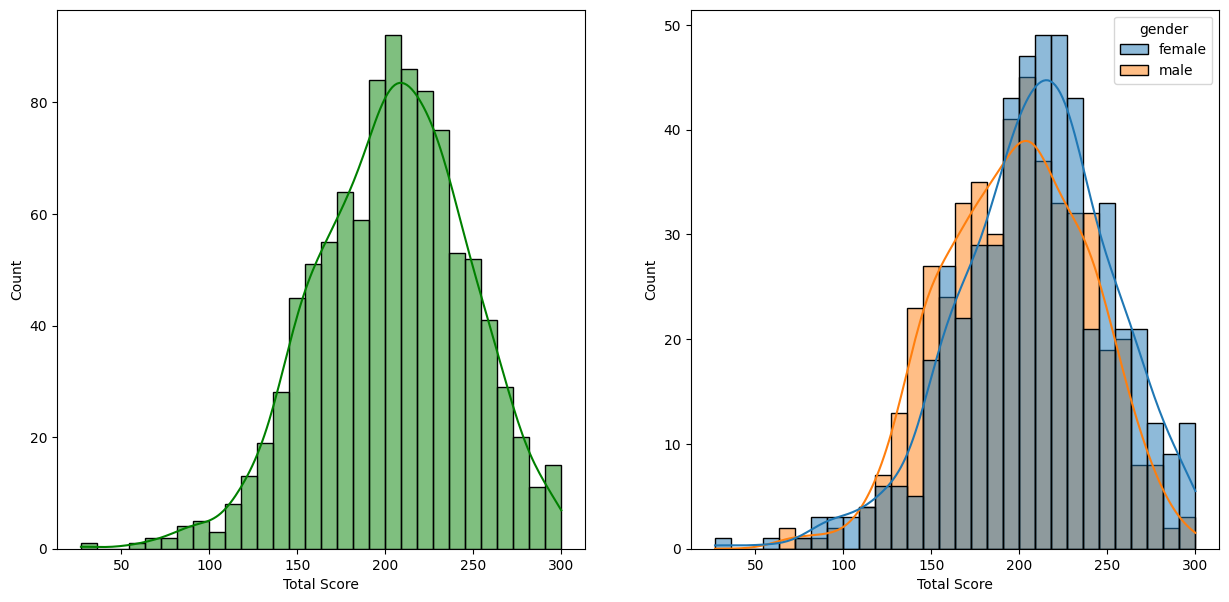

In [16]:
fig, axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,hue='gender')

In [17]:
#Female students perform well

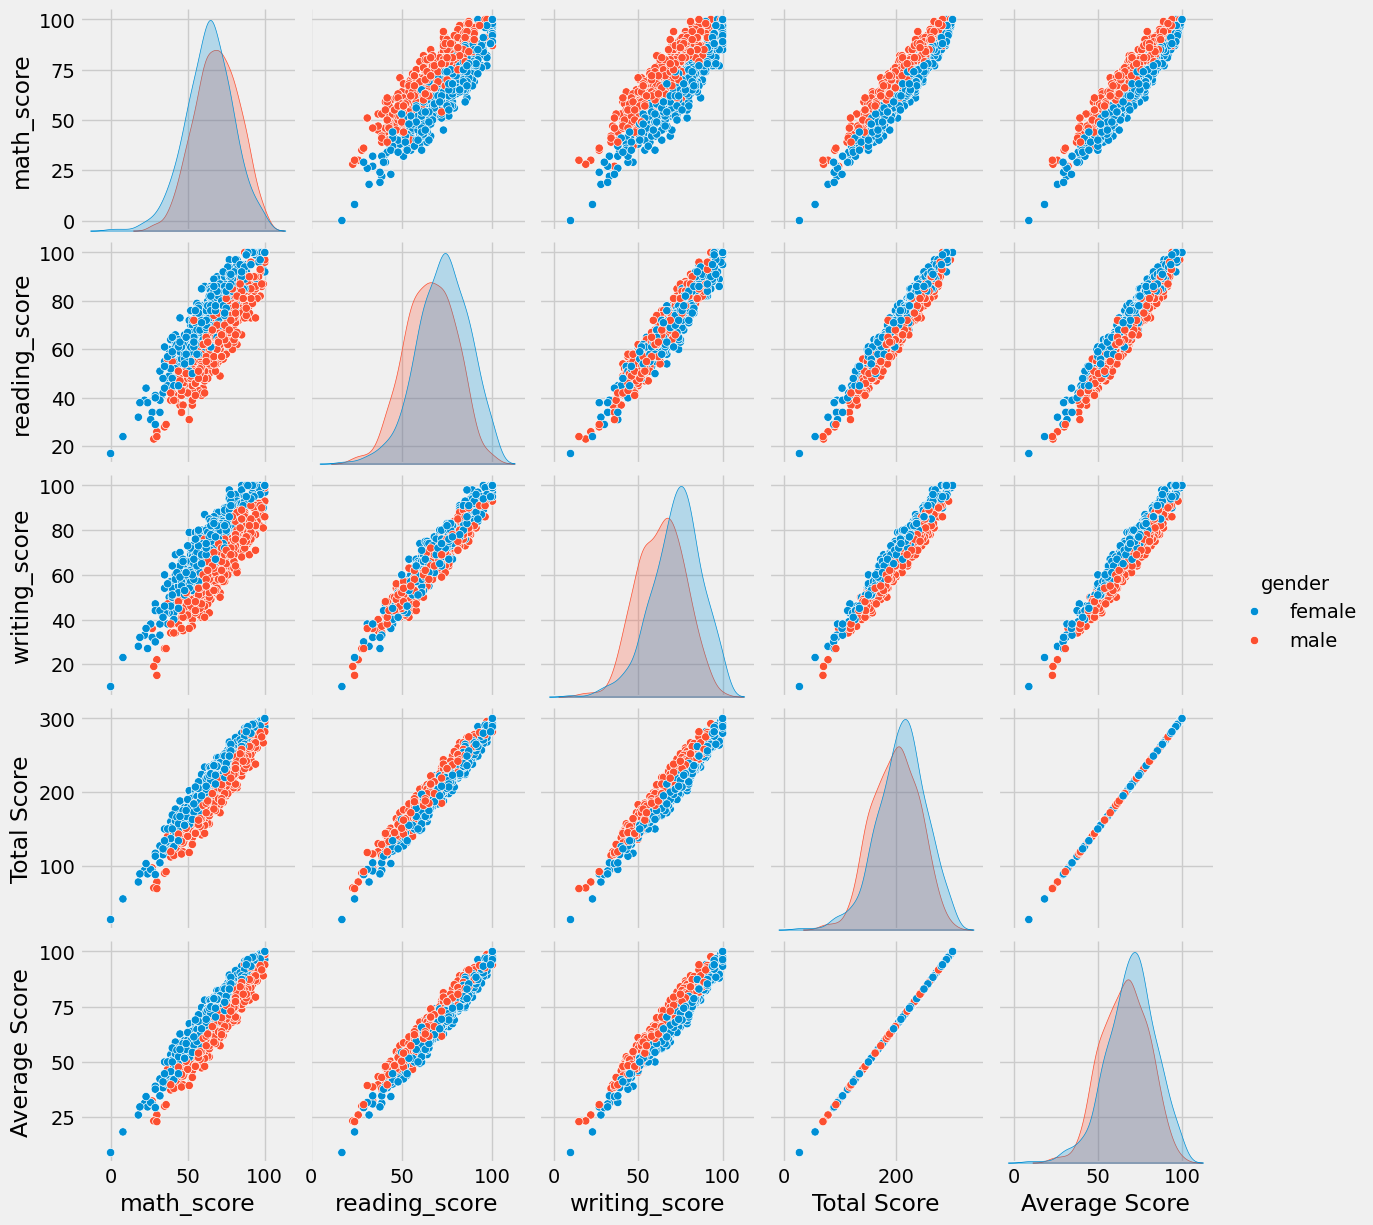

In [55]:
sns.pairplot(df,hue='gender')

<Axes: ylabel='Frequency'>

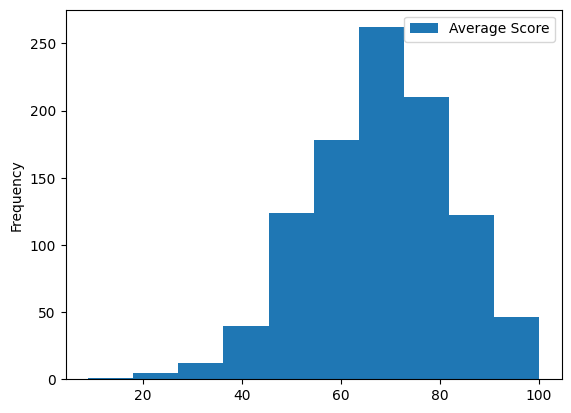

In [41]:
df.plot(x='parental_level_of_education',y='Average Score',kind='hist')



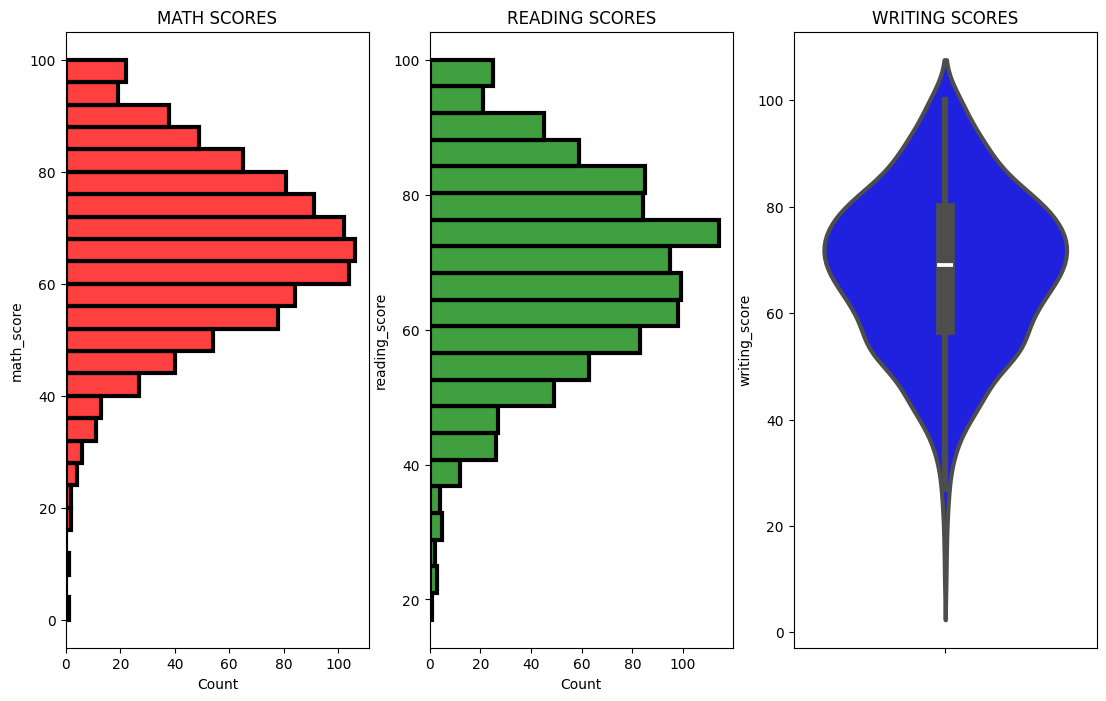

In [52]:
#Maximum score of students in all 3 subjects
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('MATH SCORES')
sns.histplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(142)
plt.title('READING SCORES')
sns.histplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(143)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

gender
female    518
male      482
Name: count, dtype: int64


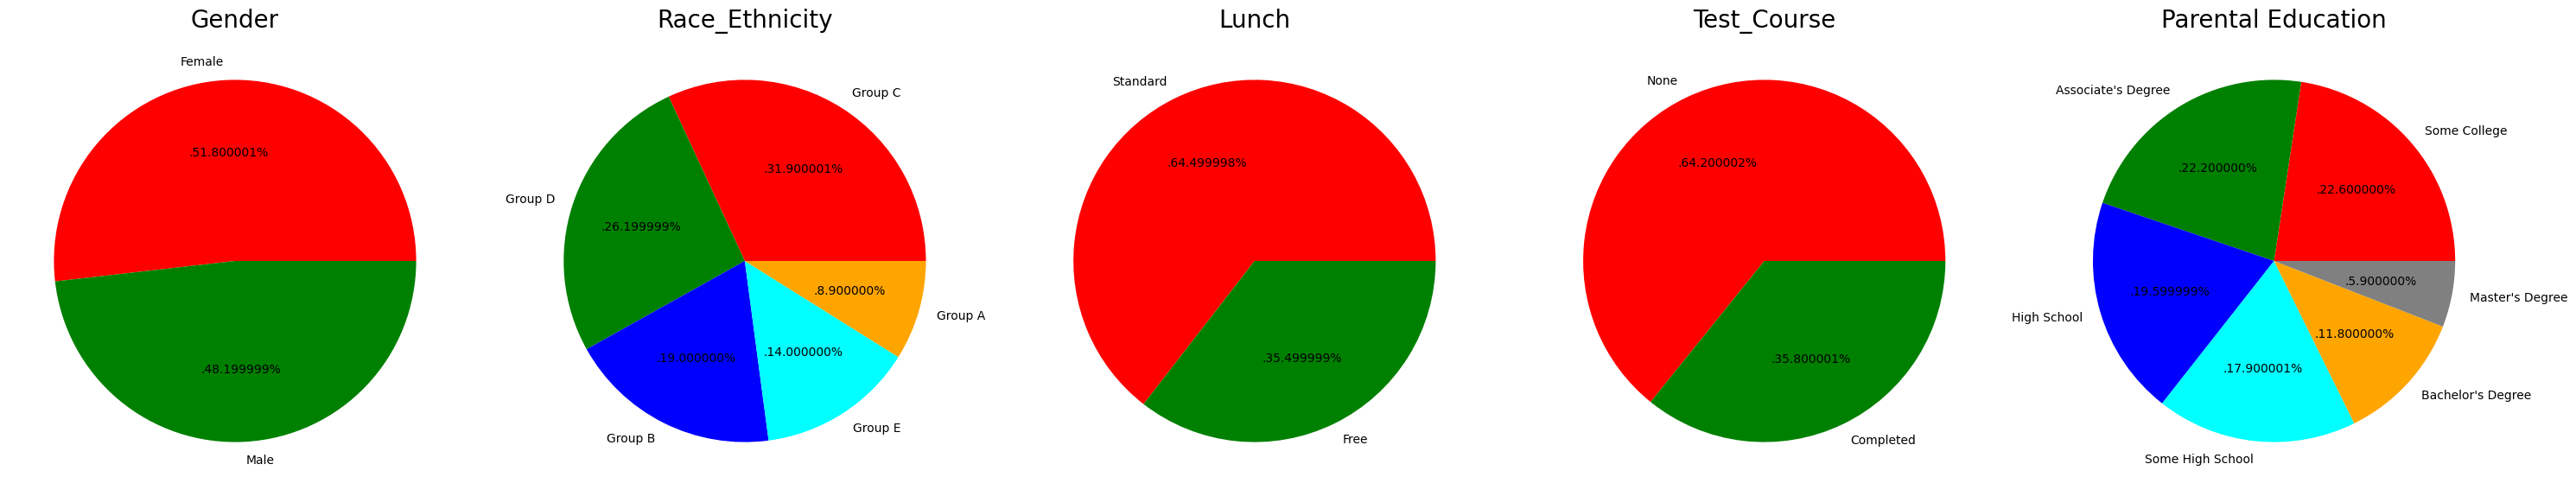

In [62]:
#multivariate analysis
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
print(size)
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


Axes(0.125,0.11;0.352273x0.77)


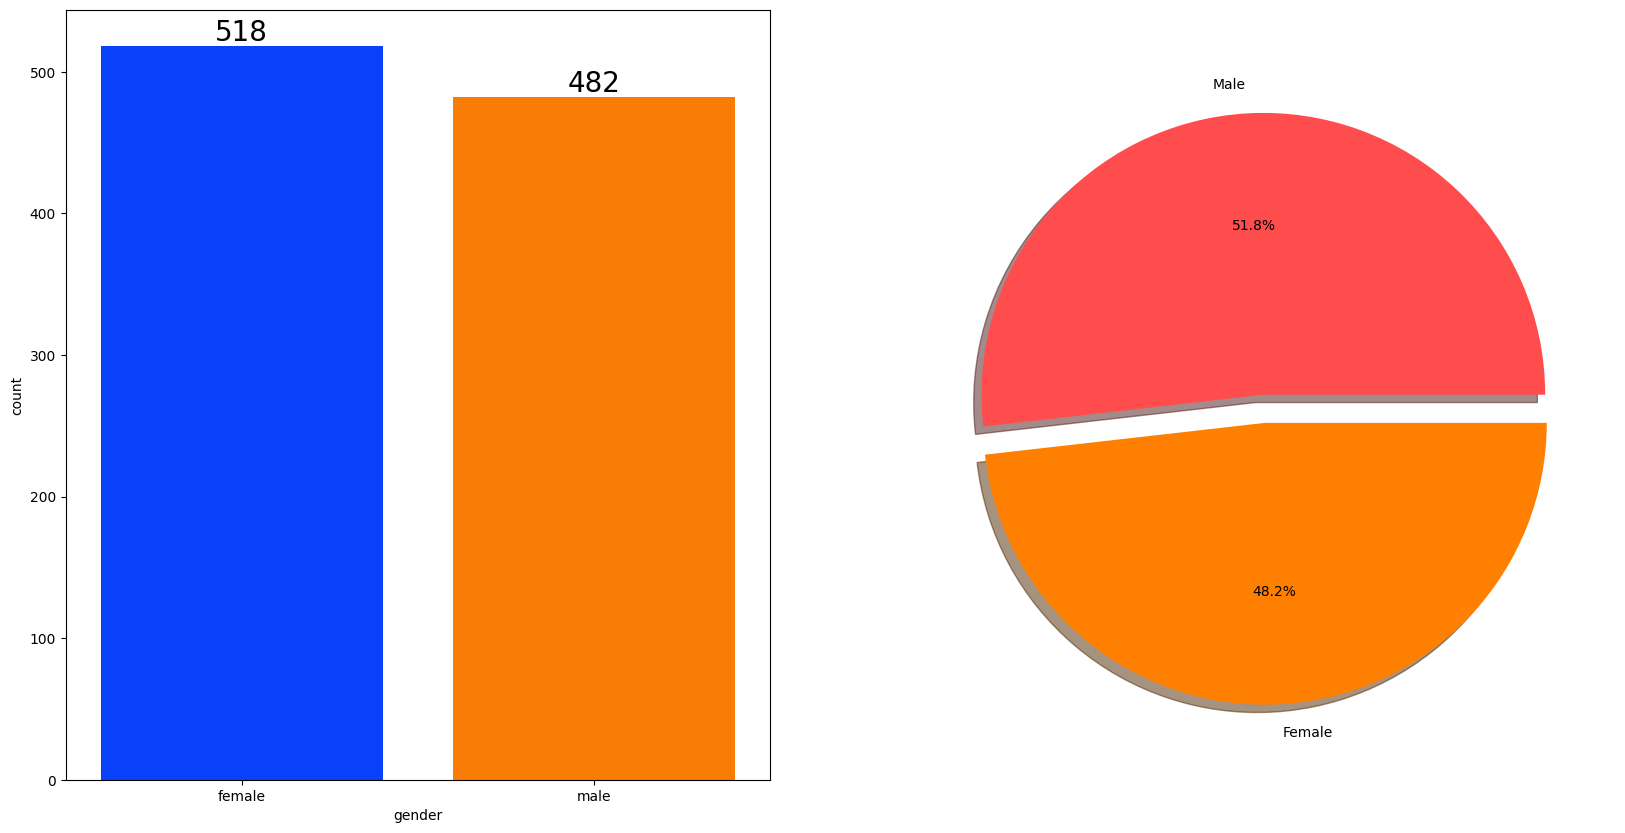

In [82]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
print(ax[0])
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [8]:
gender_group = df.groupby('gender')
gender_group


In [39]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average Score'][0].mean(), gender_group['math score'][0].mean()]
male_scores = [gender_group['Average Score'][1].mean(), gender_group['math score'][1].mean()]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

IndexError: Column(s) Average Score already selected

<Figure size 1000x800 with 0 Axes>

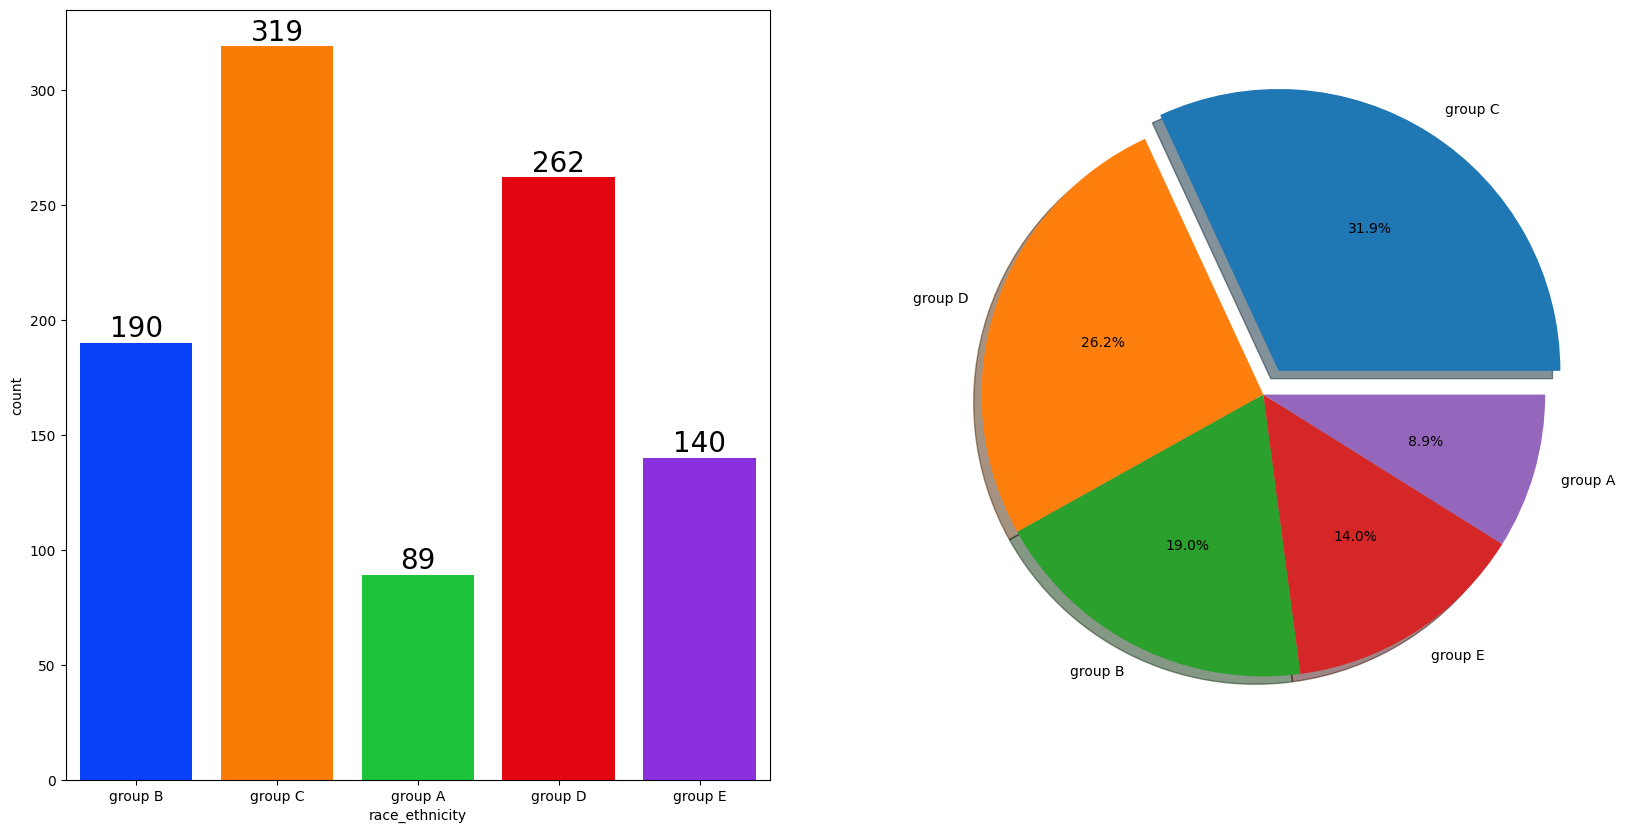

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 


race_ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math_score, dtype: float64


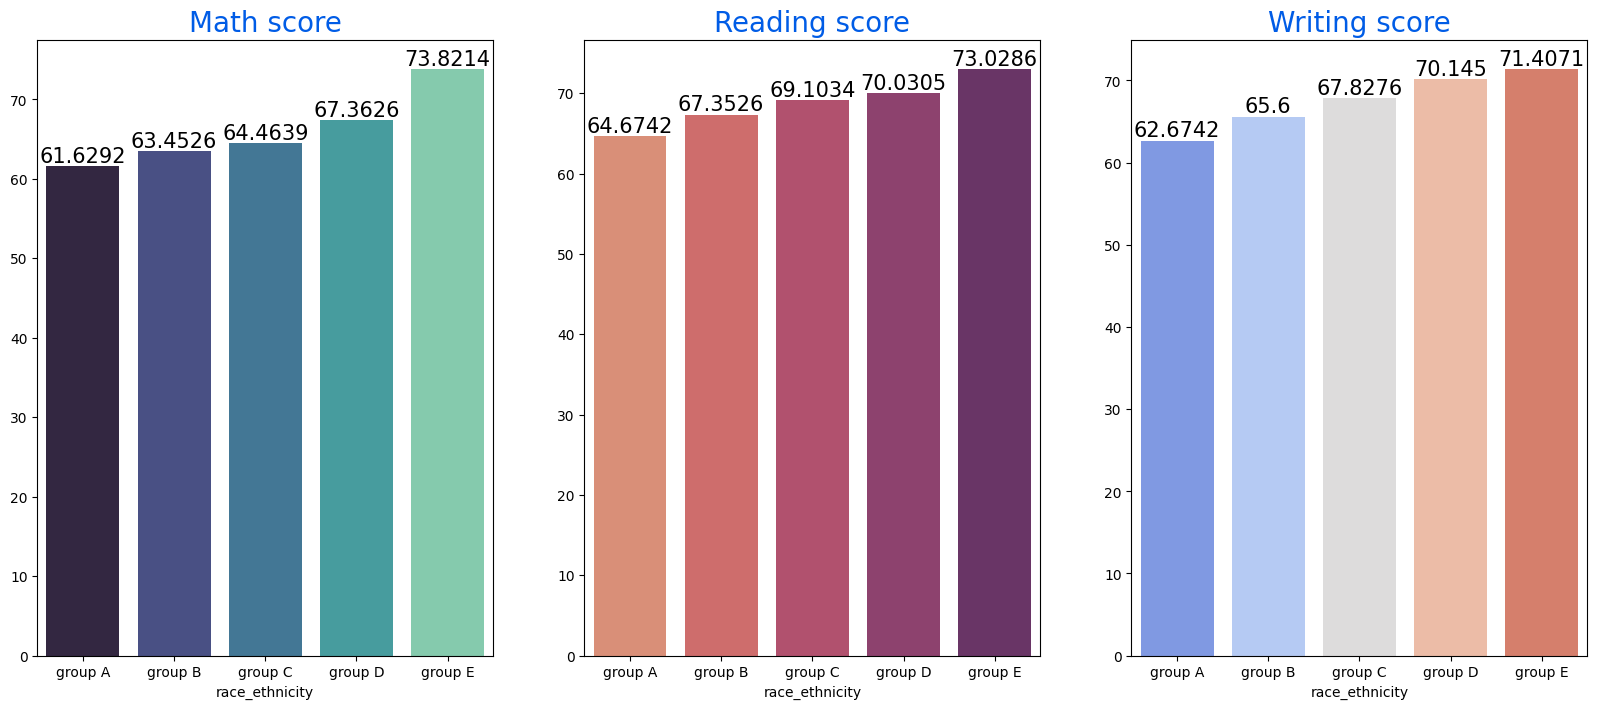

In [37]:
Group_data2=df.groupby('race_ethnicity')
x=Group_data2['math_score'].mean()
print(x)
print(Group_data2)
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

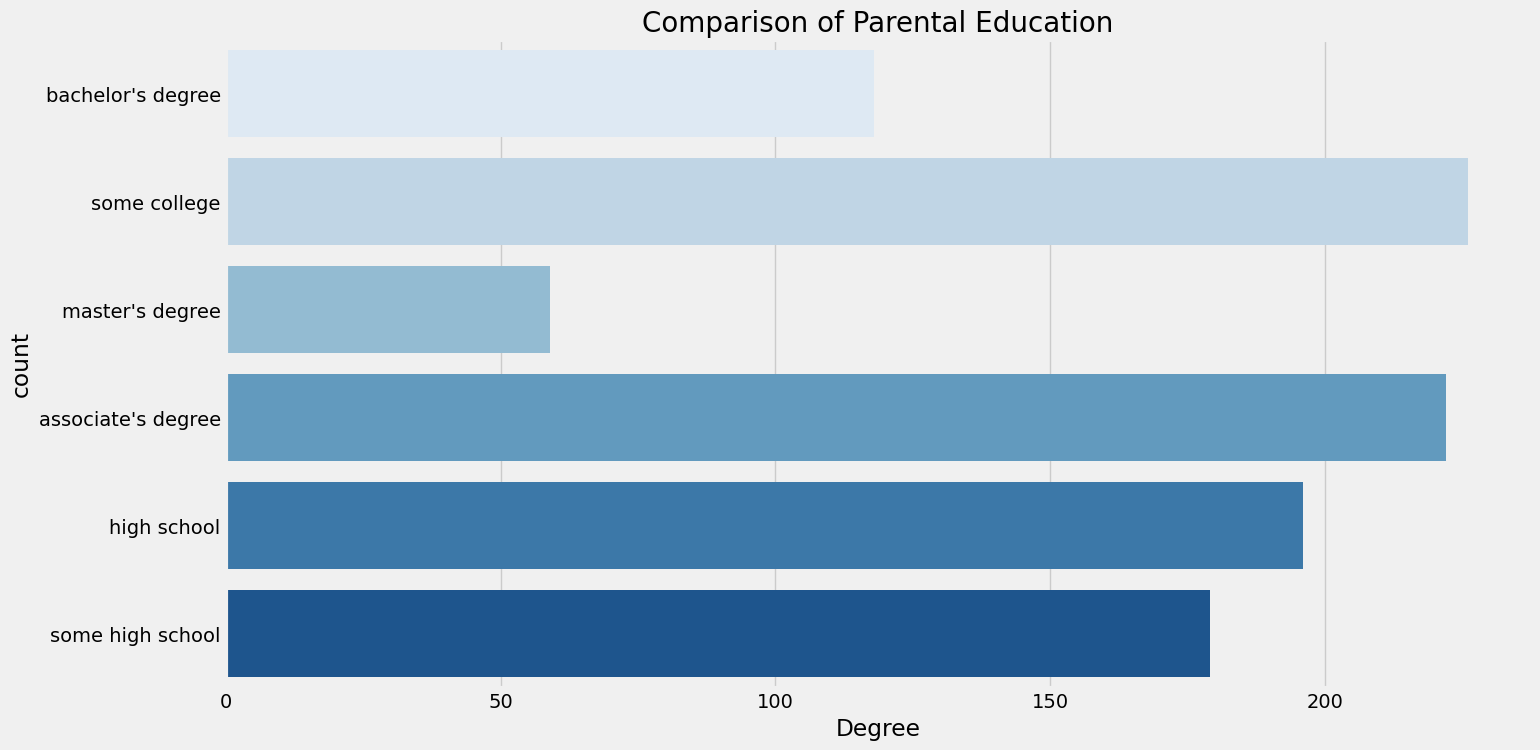

In [52]:
#plt.rcParams['figure.figsize'] = (15, 9)
plt.figure(figsize=(15, 8))

sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [54]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

TypeError: Could not convert malefemalemalemalefemalemalefemalefemalemalemalefemalefemalefemalemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalefemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalefemalefemalemalemalefemalefemalefemalemalefemalemalefemalemalefemalemalefemalemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalemalemalemalefemalemalefemalefemalefemalefemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalemalefemalemalefemalemalefemalemalemalemalefemalemalemalemalefemalemalefemalefemalemalefemalefemalefemalefemalemalemalefemalefemalefemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalemalemalemalefemalefemalefemalemalefemalefemalemalemalefemalefemalefemalefemalefemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalemalemalemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalemalefemalefemalemalemalefemalefemalemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalemalefemalemalemalefemalemalemalemalemalemalemalefemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalemalefemalemalefemalefemalemalefemalefemalefemale to numeric

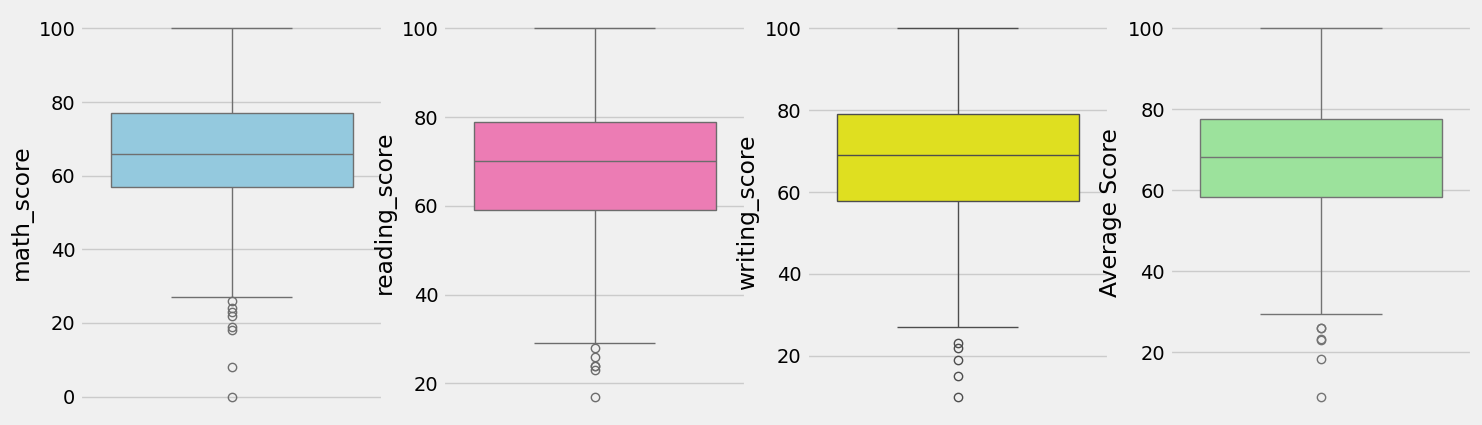

In [58]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average Score'],color='lightgreen')
plt.show()